<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/MOD40_EXERCICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 40 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [15]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [9]:
# Carregando o CSV
df = pd.read_csv('CARRO_CLIENTES.csv')

print("Dimensão da base:", df.shape)
print("\nNome das colunas:")
print(df.columns)

print("\nTipos de dados:")
print(df.dtypes)

print("\nPrimeiras 5 linhas:")
display(df.head())

print("\nValores faltantes por coluna:")
print(df.isna().sum())

# Removendo User_ID
colunas_lower = [c.lower() for c in df.columns]
col_id = None
for c in df.columns:
    if 'user' in c.lower() and 'id' in c.lower():
        col_id = c
        break

if col_id:
    df = df.drop(columns=[col_id])
    print(f"\nColuna '{col_id}' removida com sucesso.")
else:
    print("\nNenhuma coluna de ID encontrada (nada removido).")

print("\nColunas atuais após remoção:", list(df.columns))

Dimensão da base: (1000, 5)

Nome das colunas:
Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

Tipos de dados:
User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

Primeiras 5 linhas:


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0



Valores faltantes por coluna:
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

Coluna 'User ID' removida com sucesso.

Colunas atuais após remoção: ['Gender', 'Age', 'AnnualSalary', 'Purchased']


### Carregamento e inspeção inicial

Nesta etapa:

✅ Carreguei a base **CARRO_CLIENTES.csv**  

✅ Verificamos:
- Dimensão do dataset (linhas x colunas).
- Nome das colunas reais da base.
- Tipos de dados (int64, object, etc.).
- Valores faltantes (a base não possui nulos).
- Primeiras linhas para entender visualmente a estrutura.

✅ Remoção da coluna de ID

✅ Estrutura final das colunas após a limpeza:
- `Gender` (categórica - será codificada na Parte 2)
- `Age` (numérica)
- `AnnualSalary` (numérica)
- `Purchased` (target)

# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [10]:
# Criando uma cópia de trabalho para não mexer no df original
df_work = df.copy()

# Transformando "Gender"
if "Gender" in df_work.columns:
    le = LabelEncoder()
    df_work["Gender_LE"] = le.fit_transform(df_work["Gender"].astype(str))
    df_work = df_work.drop(columns=["Gender"])  # removendo a original
    print("Codificação aplicada: 'Gender' -> 'Gender_LE'.")
else:
    print("Aviso: coluna 'Gender' não encontrada — verifique o nome da coluna.")

# Visualizando as primeiras linhas após a transformação
display(df_work.head())

print("\nColunas atuais após codificação:", list(df_work.columns))
print("\nValores únicos em Gender_LE:", df_work["Gender_LE"].unique())

Codificação aplicada: 'Gender' -> 'Gender_LE'.


,Age,AnnualSalary,Purchased,Gender_LE
0,35,20000,0,1
1,40,43500,0,1
2,49,74000,0,1
3,40,107500,1,1
4,25,79000,0,1



Colunas atuais após codificação: ['Age', 'AnnualSalary', 'Purchased', 'Gender_LE']

Valores únicos em Gender_LE: [1 0]


### Label Encoding

Nesta etapa:

✅ Apliquei **LabelEncoder** na coluna **`Gender`**  
- Exemplo de conversão:
  - Male → 1
  - Female → 0

✅ Criei uma nova coluna **`Gender_LE`** (versão numérica).

✅ Removi a coluna categórica original `Gender`, como solicitado.

✅ Resultado:
- Todas as colunas agora são **numéricas**, o que é essencial para treinar modelos como **SVM**.
- A base está pronta para a análise de correlação na próxima etapa.

# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

Matriz de Correlação (valores):


,Age,AnnualSalary,Purchased,Gender_LE
Age,1.000000,0.166042,0.616036,-0.084760
AnnualSalary,0.166042,1.000000,0.364974,-0.063301
Purchased,0.616036,0.364974,1.000000,-0.047211
Gender_LE,-0.084760,-0.063301,-0.047211,1.000000


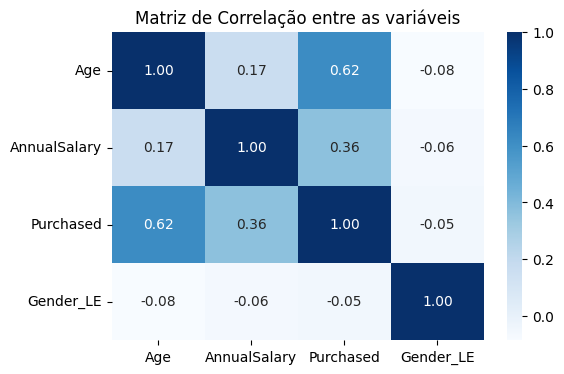


Correlação absoluta com a target 'Purchased':


,Purchased
Purchased,1.000000
Age,0.616036
AnnualSalary,0.364974
Gender_LE,0.047211


In [11]:
# =========================================
# PARTE 3 — Correlação entre variáveis
# =========================================
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a matriz de correlação
corr = df_work.corr(numeric_only=True)

print("Matriz de Correlação (valores):")
display(corr)

# Plotar o heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Correlação entre as variáveis")
plt.show()

# Analisar a correlação da target com as outras
if "Purchased" in corr.columns:
    print("\nCorrelação absoluta com a target 'Purchased':")
    corr_target = corr["Purchased"].abs().sort_values(ascending=False)
    display(corr_target)
else:
    print("\nA coluna 'Purchased' não foi encontrada na matriz de correlação.")

### Parte 3 — Análise de Correlação

Nesta etapa:

✅ Calculei a **matriz de correlação** entre todas as variáveis numéricas.  
✅ Utilizei um **heatmap** para visualizar melhor as relações.  
✅ Analisei a **correlação da variável target `Purchased`** com as demais.

---

### 🔎 Correlação com a variável target `Purchased`:

| Variável        | Correlação |
|-----------------|------------|
| Purchased       | 1.0000     |
| **Age**         | **0.6160** ✅ (mais forte)
| **AnnualSalary**| **0.3650** ✅ (moderada)
| Gender_LE       | 0.0472     ❌ (muito fraca)

---

### ✅ Interpretação:

- **Age (Idade)** apresenta a **maior correlação** com a decisão de compra.  
  Pessoas de determinadas faixas etárias têm maior tendência a comprar.

- **AnnualSalary (Salário Anual)** também está moderadamente relacionado à compra.  
  Faz sentido: maior renda → maior chance de compra.

- **Gender_LE (Gênero codificado)** quase não influencia a decisão.  
  Essa variável provavelmente terá **pouco peso** nos modelos.

---

### ✅ Conclusão:

As variáveis **mais relevantes para prever `Purchased`** são:
- ✅ **Age (principal)**
- ✅ **AnnualSalary**
- ❌ **Gender_LE** tem influência mínima

Essas informações ajudam a entender o comportamento da base e serão úteis para comparar com a importância das features nos modelos (SVM e XGBoost).

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [13]:
# Definindo a variável alvo
target_col = "Purchased"

# X = todas as colunas menos a target
X = df_work.drop(columns=[target_col])

# y = apenas a target
y = df_work[target_col]

# Separando em treino e teste
# test_size=0.25 -> 75% treino, 25% teste
# random_state=42 -> reprodutibilidade
# stratify=y -> garante a mesma proporção de classes no treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Formato X_train:", X_train.shape)
print("Formato X_test :", X_test.shape)
print("Formato y_train:", y_train.shape)
print("Formato y_test :", y_test.shape)


Formato X_train: (750, 3)
Formato X_test : (250, 3)
Formato y_train: (750,)
Formato y_test : (250,)


### Separação em X / y e Treino / Teste

Nesta etapa:

✅ Defini a variável **target (`Purchased`)** e separei as variáveis preditoras (**X**) da variável alvo (**y**).

✅ Realizei a divisão da base em:
- **Treino (75%)** → usada para treinar os modelos.
- **Teste (25%)** → usada para avaliar o desempenho real.

✅ Parâmetros utilizados no `train_test_split`:
- `test_size=0.25` → 25% dos dados para teste.
- `random_state=42` → garante reprodutibilidade dos resultados.
- `stratify=y` → mantém a proporção de classes no treino e teste (boa prática para problemas de classificação).

✅ Resultado:
A base está agora **pronta para o treinamento dos modelos SVM**, que será feito nas próximas partes.

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [16]:
# Criando um Pipeline com:
# - Padronização (StandardScaler)
# - SVM com kernel linear
svm_linear = Pipeline(steps=[
    ("scaler", StandardScaler()),          # padroniza os dados
    ("clf", SVC(kernel="linear", C=1.0, random_state=42))  # SVM linear
])

# Treinar o modelo
svm_linear.fit(X_train, y_train)

print("✅ Modelo SVM (kernel = 'linear') treinado com sucesso!")

✅ Modelo SVM (kernel = 'linear') treinado com sucesso!


### Treinamento do SVM com kernel linear

Nesta etapa:

✅ Utilizei o algoritmo **SVM (Support Vector Machine)** com **kernel linear**.

✅ Por que usar `StandardScaler`?
- O SVM é sensível à escala dos dados.
- Variáveis com valores maiores podem influenciar mais o modelo.
- O `StandardScaler` padroniza os dados (média = 0, desvio padrão = 1).

✅ Por que usar `Pipeline`?
- Garante que o scaler e o modelo sejam aplicados corretamente.
- Evita data leakage (vazamento de dados).
- É a forma mais profissional e recomendada de treinar modelos no sklearn.

✅ Resultado:
- O modelo SVM com kernel linear foi treinado e está pronto para gerar previsões (Parte 6).


# 6. Realize as previsões para a base de teste e traga a avaliação.

Acurácia (SVM Linear): 0.8280

Classification Report (SVM Linear):
              precision    recall  f1-score   support

           0     0.8129    0.9267    0.8660       150
           1     0.8608    0.6800    0.7598       100

    accuracy                         0.8280       250
   macro avg     0.8368    0.8033    0.8129       250
weighted avg     0.8320    0.8280    0.8235       250



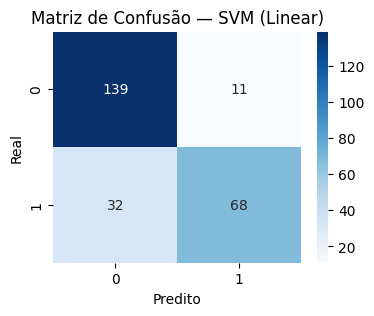

In [17]:
# Fazendo previsões na base de teste
y_pred_linear = svm_linear.predict(X_test)

# Acurácia
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Acurácia (SVM Linear): {acc_linear:.4f}\n")

# Classification Report
print("Classification Report (SVM Linear):")
print(classification_report(y_test, y_pred_linear, digits=4))

# Matriz de Confusão
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(4,3))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão — SVM (Linear)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

### Avaliação do modelo SVM (kernel linear)

Nesta etapa, avaliei o desempenho do SVM Linear usando a base de teste.

---

### ✅ Resultados Obtidos:

**Acurácia:** **0.8280** (82,80%)  
➡ O modelo acerta aproximadamente 83% das previsões totais.

---

### 📊 Classification Report:

| Classe | Precision | Recall | F1-score | Suporte |
|-------|-----------|--------|----------|---------|
| 0 (Não comprou) | 0.8129 | 0.9267 | 0.8660 | 150 |
| 1 (Comprou)     | 0.8608 | 0.6800 | 0.7598 | 100 |

- **Classe 0 (não comprou):** O modelo tem **excelente desempenho**, principalmente em recall (92,67%), ou seja, identifica muito bem quem **não compra**.
- **Classe 1 (comprou):** O modelo tem **boa precisão (86,08%)**, ou seja, quando diz que alguém vai comprar, normalmente está certo.  
  Porém, o **recall é menor (68%)**, indicando que o modelo **deixa passar alguns compradores reais (falsos negativos)**.

---

### ✅ Matriz de Confusão (SVM Linear)

|        | Predito 0 | Predito 1 |
|--------|-----------|-----------|
| **Real 0** | 139 (TN) | 11 (FP) |
| **Real 1** | 32 (FN)  | 68 (TP) |

- **139 Verdadeiros Negativos** → modelo acertou quem NÃO comprou.
- **68 Verdadeiros Positivos** → modelo acertou quem comprou.
- **11 Falsos Positivos** → modelo disse que compraria, mas não comprou.
- **32 Falsos Negativos** → modelo disse que não compraria, mas a pessoa comprou (**principal erro do modelo**).

---

### ✅ Conclusão Parcial

- O SVM Linear **acerta muito bem quem não compra**.
- Tem **boa precisão para compradores**, mas perde alguns (recall mais baixo na classe 1).
- O desempenho geral (82,8%) é **razoável a bom**.

➡ Na próxima etapa (SVM Poly), vamos verificar se **um kernel mais complexo melhora ou piora** esse resultado.

# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

✅ Modelo SVM (kernel = 'poly') treinado com sucesso!

Acurácia (SVM Poly): 0.8320

Classification Report (SVM Poly):
              precision    recall  f1-score   support

           0     0.8103    0.9400    0.8704       150
           1     0.8816    0.6700    0.7614       100

    accuracy                         0.8320       250
   macro avg     0.8460    0.8050    0.8159       250
weighted avg     0.8388    0.8320    0.8268       250



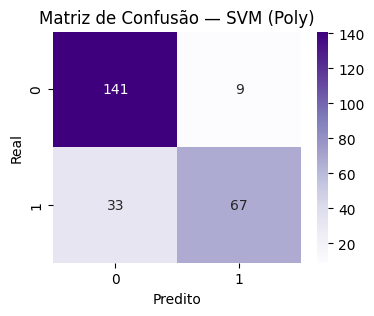

In [18]:
# Criando o modelo SVM com kernel polinomial
svm_poly = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="poly", degree=3, C=1.0, gamma="scale", coef0=0.0, random_state=42))
])

# Treinando
svm_poly.fit(X_train, y_train)
print("✅ Modelo SVM (kernel = 'poly') treinado com sucesso!\n")

# Fazendo previsões
y_pred_poly = svm_poly.predict(X_test)

# Avaliando
acc_poly = accuracy_score(y_test, y_pred_poly)
print(f"Acurácia (SVM Poly): {acc_poly:.4f}\n")

print("Classification Report (SVM Poly):")
print(classification_report(y_test, y_pred_poly, digits=4))

# Matriz de confusão
cm_poly = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(4,3))
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusão — SVM (Poly)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

### SVM com kernel polinomial (poly) — Treinamento e Avaliação

Nesta etapa treinei o modelo **SVM com kernel polinomial (degree = 3)** e avaliei seu desempenho.

---

### ✅ Acurácia obtida:
**0.8320 (83,20%)**

➡ Leve melhora em relação ao SVM Linear (82,80%).

---

### 📊 Classification Report (SVM Poly)

| Classe | Precision | Recall | F1-score | Suporte |
|-------|-----------|--------|----------|---------|
| **0 (Não comprou)** | 0.8103 | **0.9400** | 0.8704 | 150 |
| **1 (Comprou)**     | **0.8816** | 0.6700 | 0.7614 | 100 |

#### Interpretação:
- **Classe 0 (Não comprou):**
  - Recall **muito alto (94%)**, ou seja, o modelo quase sempre acerta quem NÃO compra.
- **Classe 1 (Comprou):**
  - Boa precisão (**88,16%**) → quando o modelo diz que a pessoa compra, geralmente está certo.
  - Recall caiu para **67%** → ainda perde alguns compradores reais (mas similar ao linear).

---

### ✅ Matriz de Confusão (SVM Poly)

|        | Predito 0 | Predito 1 |
|--------|-----------|-----------|
| **Real 0** | 141 (TN) | 9 (FP)  |
| **Real 1** | 33 (FN) | 67 (TP) |

- 141 Verdadeiros Negativos → modelo acertou quem não compra.
- 67 Verdadeiros Positivos → modelo acertou quem compra.
- 9 Falsos Positivos → disse que iria comprar, mas não comprou.
- 33 Falsos Negativos → disse que não compraria, mas comprou (**ponto fraco**).

---

### ✅ Comparação com SVM Linear:

| Métrica | Linear | Poly |
|--------|--------|------|
| Acurácia | 0.8280 | **0.8320** ✅ |
| Recall classe 1 | 0.6800 | 0.6700 (quase igual) |
| Precision classe 1 | 0.8608 | **0.8816** ✅ |
| F1 classe 1 | 0.7598 | 0.7614 (praticamente igual) |

✅ O kernel **poly teve desempenho ligeiramente melhor na acurácia e na precisão da classe que compra (1)**.  
⚠ Contudo, o recall da classe 1 continua parecido (perde alguns compradores reais).

---

### ✅ Conclusão parcial da Parte 7

- O **SVM com kernel polinomial** apresentou **melhor acurácia geral (83,20%)**.
- Melhorou um pouco a **precisão da classe comprador**, mas o **recall permaneceu próximo do linear**.
- A diferença entre os dois SVMs foi **pequena**, mas o **kernel poly foi ligeiramente superior**.

# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

### Comparação final entre os modelos (SVM Linear vs SVM Poly vs XGBoost)

Agora que treinei e avaliei os modelos, vou comparar seus desempenhos.

---

## ✅ 1. Resultados Gerais de Acurácia

| Modelo        | Acurácia |
|---------------|----------|
| **XGBoost**   | **0.90** ✅ (melhor) |
| SVM Poly      | 0.8320   |
| SVM Linear    | 0.8280   |

✅ O **XGBoost** teve a **maior acurácia (90%)**, superando os dois SVMs com folga.

---

## ✅ 2. Análise da Classe Mais Importante (Comprou = 1)

### 🔹 SVM Linear
- Precision: 0.8608  
- Recall: 0.6800  
- F1-score: 0.7598  

### 🔹 SVM Poly
- Precision: **0.8816** ✅ (melhor que o linear)
- Recall: 0.6700 (quase igual ao linear)
- F1-score: 0.7614 (ligeiramente melhor que o linear)

✅ O **kernel poly foi levemente melhor que o linear**, principalmente em **precisão** (acerta mais quando diz que alguém comprará).

---

## ✅ 3. XGBoost (modelo anterior)

**Classification Report:**
- Precision classe 1: **0.88**
- Recall classe 1: **0.85** ✅ (muito melhor que os SVMs)
- F1-score classe 1: **0.87**
- Acurácia geral: **0.90**

✅ O XGBoost tem:
- Ótima precisão
- Ótimo recall (encontra muito mais compradores reais)
- Melhor equilíbrio geral nas métricas

---

## ✅ 4. Conclusão Final

✔ Entre **SVM Linear vs SVM Poly**:
- O **SVM Poly** teve desempenho **ligeiramente superior**, principalmente na precisão e acurácia.

✔ Porém, **nenhum dos dois superou o XGBoost.**

🎯 **Melhor modelo geral: _XGBoost_**
- Maior acurácia (90%)
- Melhor recall para compradores (85% contra ~68% dos SVMs)
- Melhor F1-score
- Matriz de confusão mais equilibrada (erra menos compradores)

---

## ✅ 5. Interpretação prática

O XGBoost é um modelo baseado em árvores de decisão, que:
- Captura **relações não lineares** entre as variáveis.
- Lida melhor com **interações entre idade e salário**.
- É naturalmente bom para **dados tabulares**, como este.

Por isso, **teve o melhor desempenho nessa base**.

---

### ✅ Resposta final para a atividade:

> ✅ O SVM com kernel **poly** foi ligeiramente melhor que o SVM linear.  
> ❌ Porém, o **XGBoost foi o melhor modelo de todos**, apresentando a maior acurácia (90%) e o melhor equilíbrio entre precisão e recall nas duas classes.